___
<h1> Machine Learning </h1>
<h2> M. Sc. in Electrical and Computer Engineering </h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[MEEC](https://ise.ualg.pt/en/curso/1477) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)
___

# Feature engineering

Feature engineering is the process of transforming raw data into meaningful features that improve model performance. It includes creating, selecting, encoding, scaling, and combining variables to better capture patterns for the learning algorithm.

Let us consider the classification problem associated to the wine database. So, we can start by loading the dataset into a pandas dataframe.


In [1]:
import pandas as pd
df = pd.read_csv('./data/winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


By calling the dataframe's `info` method, we can see that there are a few missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


For treating missing values, please refer to the corresponding notebook were some techiniques are studied, here we will simply drop the rows with missing values.

In [3]:
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 656.5+ KB


## Categorical data transformation

Most machine learning algorithms cannot handle categorical data and, in our case, the `type` column is categorical. Therefore, categorical data must be transformed into numerical data. 

There are several ways to do the transformation, like:
- One-hot encoding -- transform each category into a binary column
- Ordinal encoding -- transform each category into a number
- Binary encoding -- transform each category into a binary number
- Hash encoding -- transform each category into a hash number
- ...

Let us see how to performe the first technique. 

### One hot encoding

One hot encoding is the process of converting a categorical feature into one or more binary (0/1) columns, one for each category. Each row has a 1 in the column corresponding to its category and 0 in the others. This allows ML models to use categorical information without imposing an arbitrary ordinal relationship. In pandas, use `pd.get_dummies`, optionally with `drop_first=True` to avoid multicollinearity.


In [4]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,True
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,True
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,True
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,True
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,False
6459,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
6460,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,False
6461,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


## Classification

We will build and compare several classifiers (Logistic Regression, SVM, KNN, Random Forest, MLP) on the wine quality dataset using a helper run() to train, score, and plot confusion matrices. Subsequent sections apply scaling and polynomial features to assess their impact on performance.


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def get_X_and_y(df):
    X = df.drop('quality', axis=1)
    y = df['quality']
    return X, y

def run(df):
    # get X and y
    X, y = get_X_and_y(df)
    
    # split the data into train and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

    # these are NOT fine tuned methods. Other strategies, like grid search CV, could have beem applied
    models = {
        'LogisticRegression': LogisticRegression(random_state=42, max_iter=10000),
        'SVC': SVC(random_state=42, max_iter=10000),
        'KNN': KNeighborsClassifier(),
        'RF': RandomForestClassifier(random_state=42),
        'NN': MLPClassifier(random_state=42, max_iter=10000)
    }
 
    fig, ax = plt.subplots(len(models), 1, figsize=(10, 40))
    scores = {}
    for idx, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        pred = model.predict(X_test)
        print(f'{name}: score = {score}')

        # plot confusion matrix
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax[idx], cmap=plt.cm.Blues)
        ax[idx].set_title(f'{name}: score = {score}')
        scores[name] = score
    
    return scores

###  without scaling or poly

First, let us evaluate baseline models using the original features (no scaling, no polynomial expansion).


/opt/anaconda3/envs/ML_IDC_metal/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: score = 0.5408415841584159
SVC: score = 0.4306930693069307
KNN: score = 0.46534653465346537
RF: score = 0.6664603960396039
NN: score = 0.5235148514851485


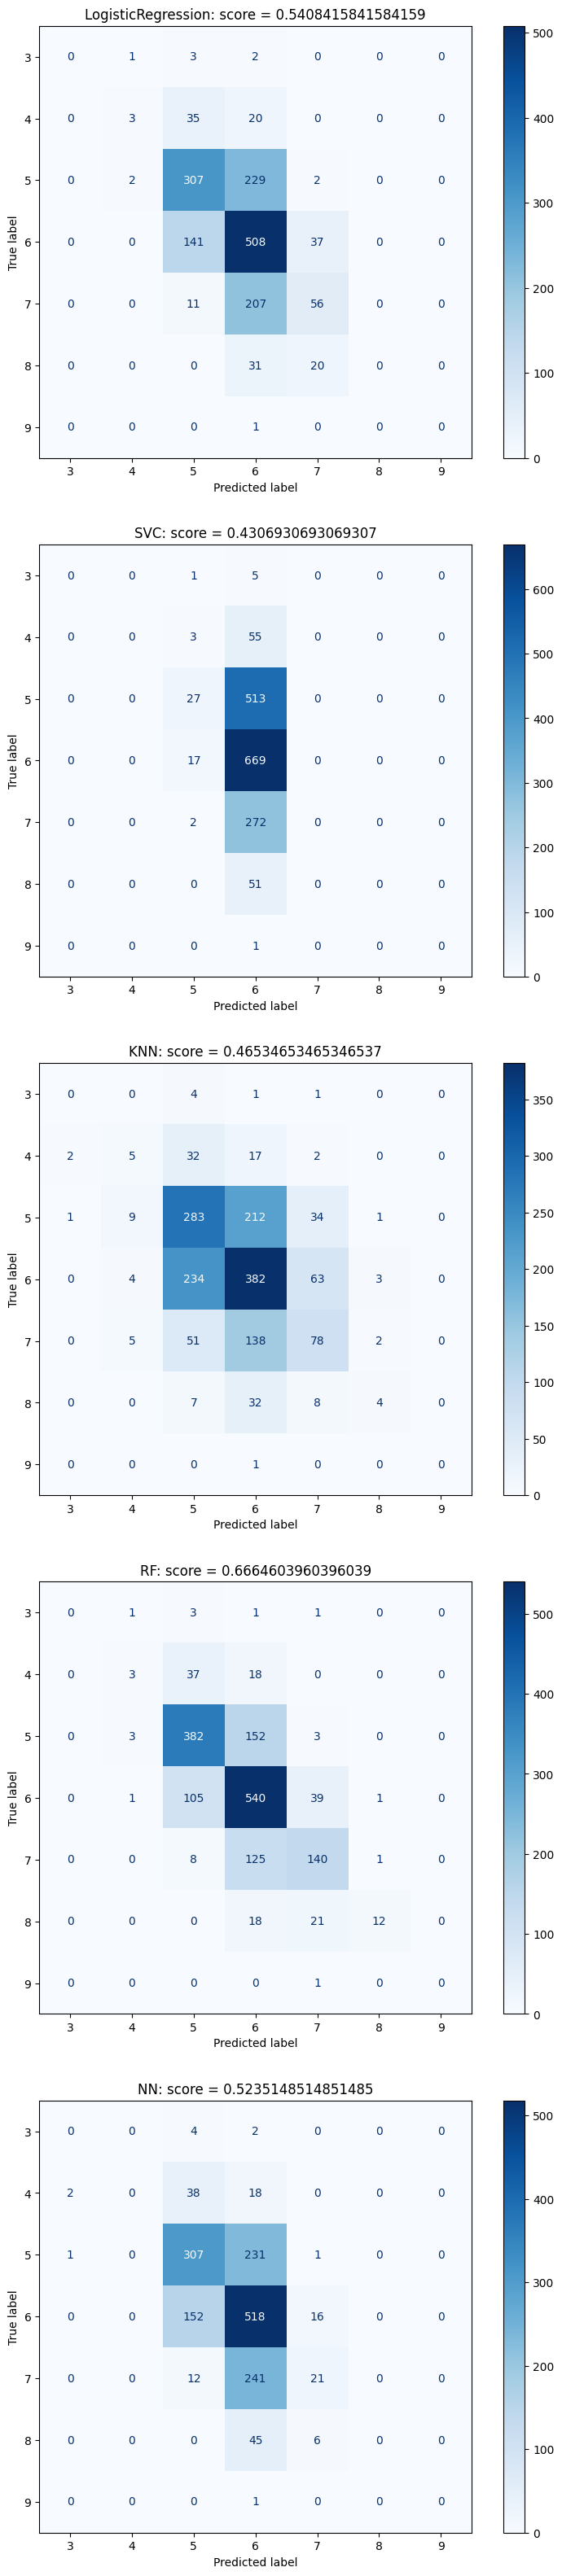

In [6]:
all_scores = pd.DataFrame()
all_scores['without scaling or poly'] = run(df)

## Feature scaling
Feature scaling is the process of transforming numerical features to a common scale. There are several ways to do this, like:
- Normalization -- transform each feature to a range between 0 and 1
- Standardization -- transform each feature to a normal distribution with mean 0 and standard deviation 1
- ...

The original dataset has the following distribution

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Box plots also help with visualization of the distribution

<Axes: >

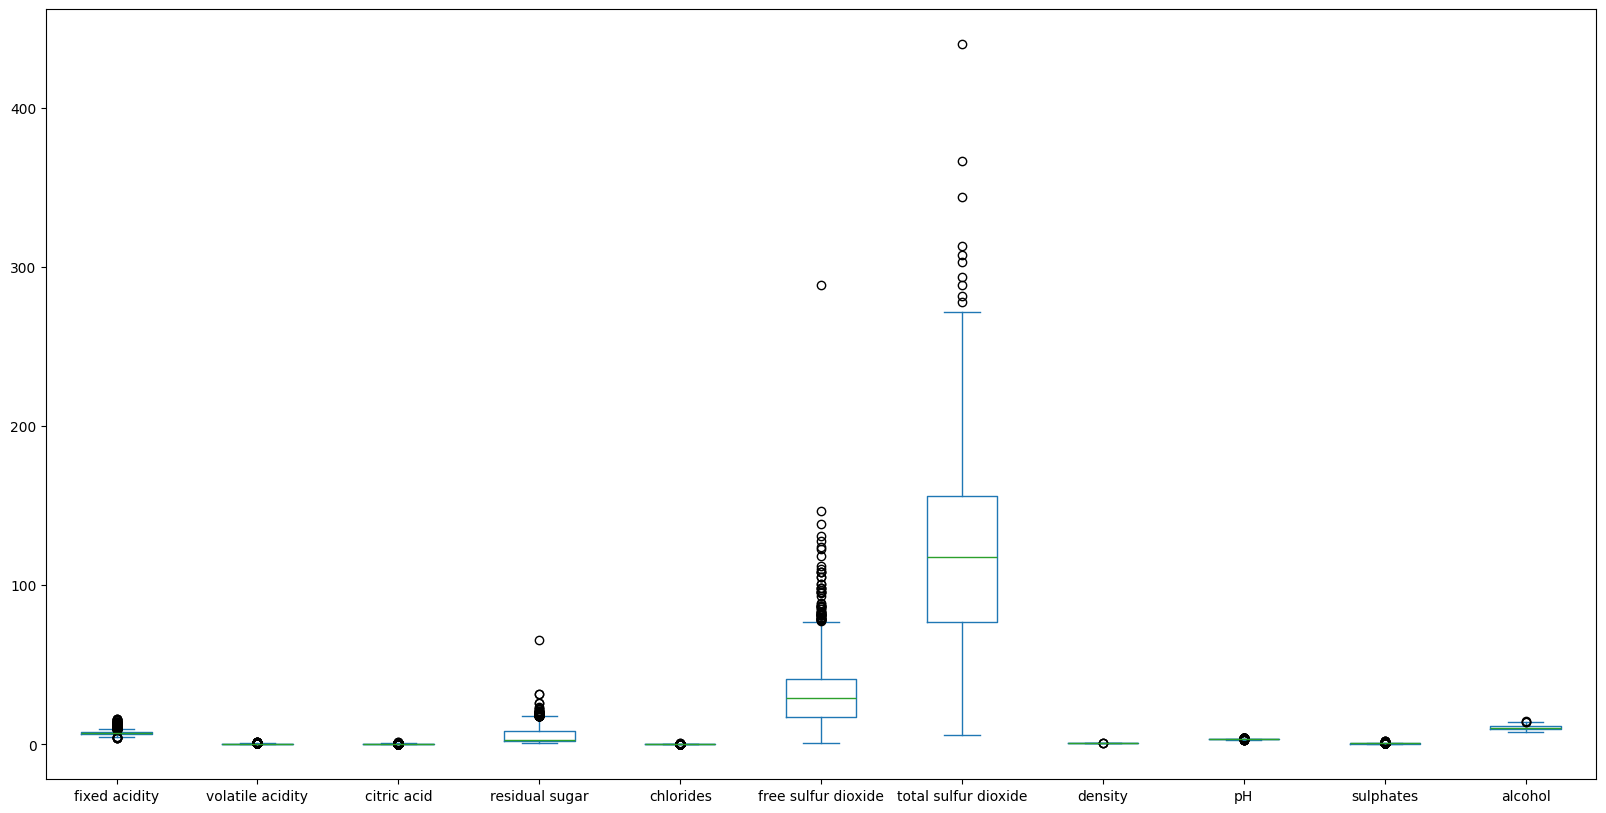

In [8]:
df.drop(['quality'], axis=1).plot(kind='box', figsize=(20,10))

### Standardization (or Z-score normalization)

Standardization is a technique used to transform numerical features to a normal distribution with mean 0 and standard deviation 1. The idea is to subtract the mean and divide by the standard deviation. The formula is given by
$$ X'_{ij} = \frac{X_{ij}-\mu_j}{\sigma_j}$$
where $X_{ij}$ is the observation $i$ for the feature $j$, $\mu_j$ is the mean and $\sigma_j$ is the standard deviation.


To achieve this, we can use the pandas mean and std methods or call the sklearn StandardScaler method.

Let us now apply the standardization technique

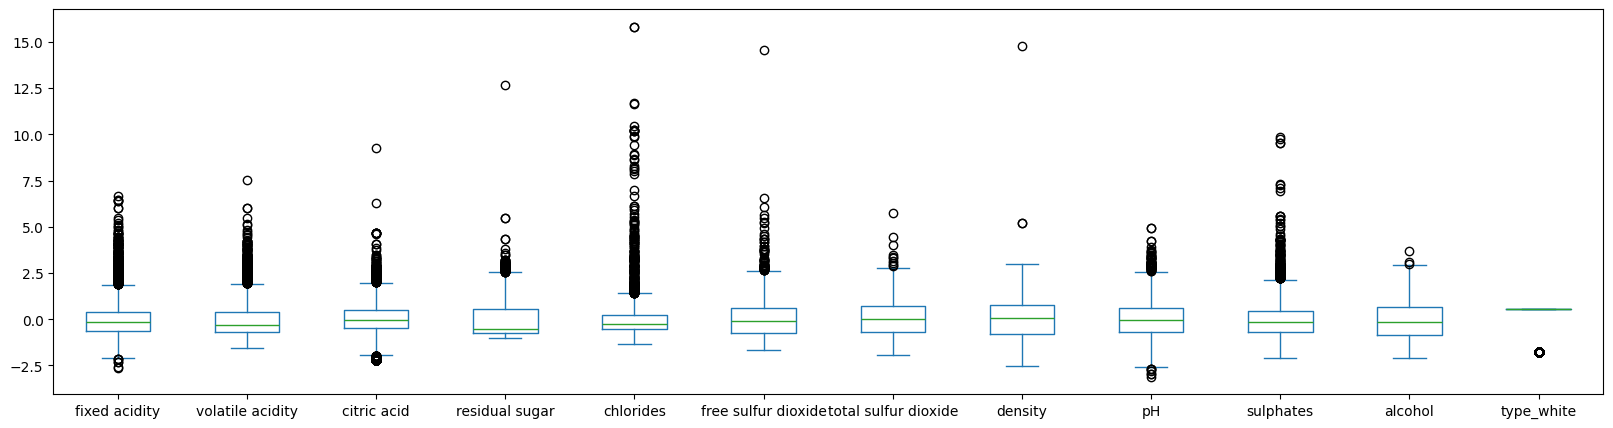

In [9]:
from sklearn.preprocessing import StandardScaler

# get X and y
X, y = get_X_and_y(df)

# set and fit the scaler
standard_scaler = StandardScaler().fit(X)

# normalize the data
df_std = pd.DataFrame(standard_scaler.transform(X), columns = X.columns)
df_std.plot(kind='box', figsize=(20,5))

df_std['quality'] = y

So, let us create a model but now using the standarderized data

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  type_white            6463 non-null   bool   
dtypes: bool(1), float64(11)
memory usage: 561.9 KB


LogisticRegression: score = 0.5426980198019802
SVC: score = 0.5792079207920792
KNN: score = 0.5544554455445545
RF: score = 0.6652227722772277
NN: score = 0.5618811881188119


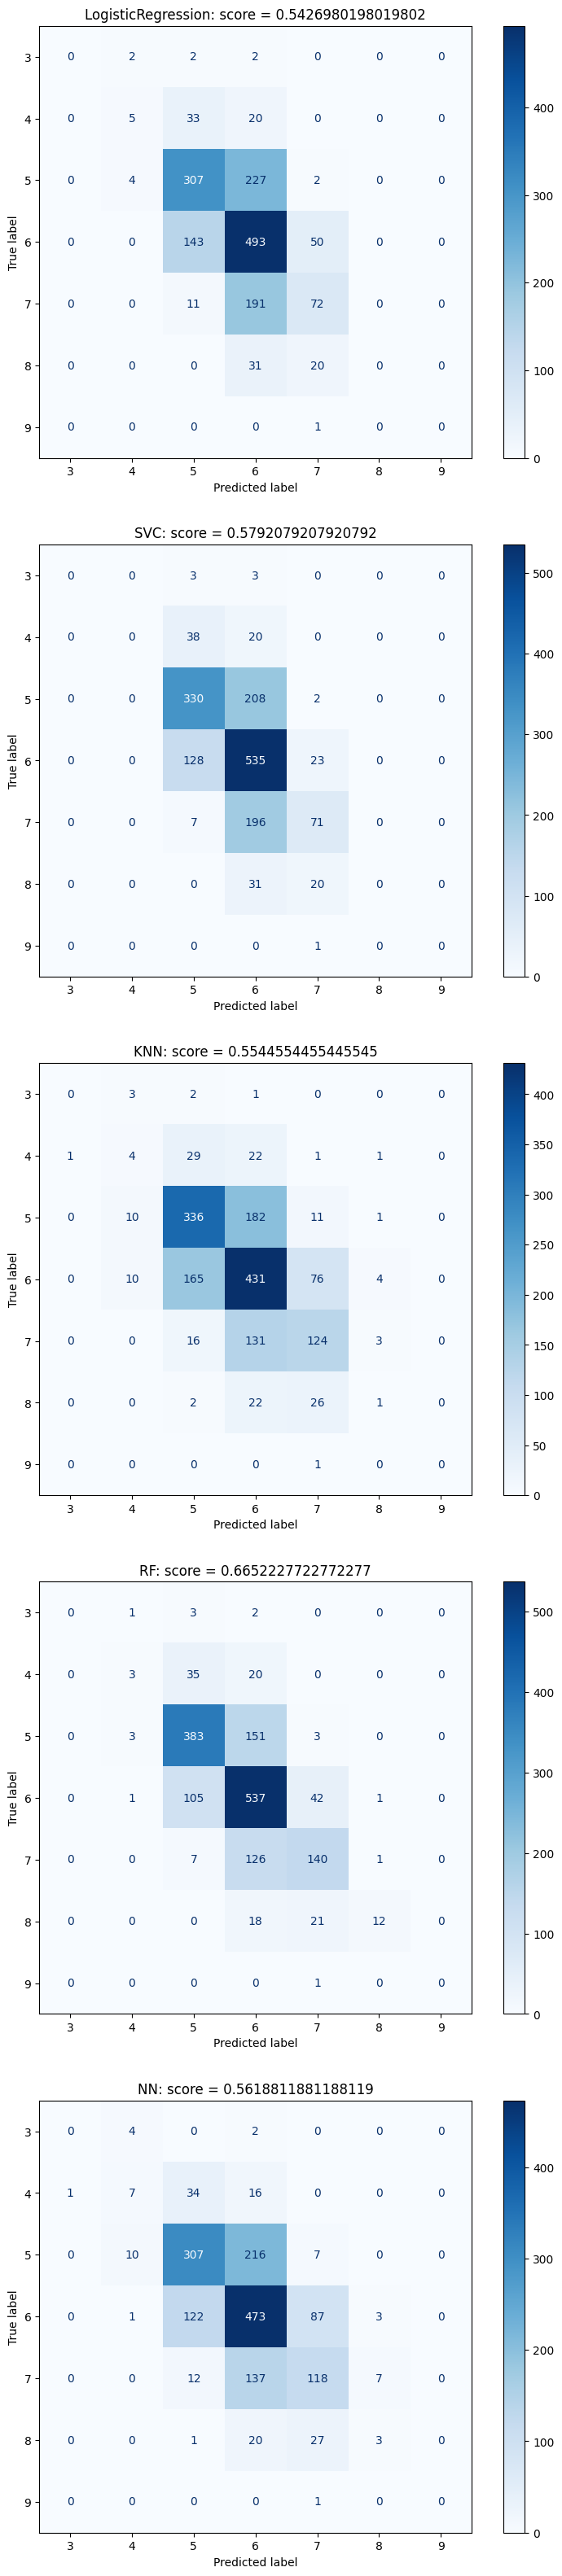

In [11]:
all_scores['with standardization'] =  run(df_std)

### MinMaxScaler

Another usual solution is to normalize the distribution by subtracting the minimum and dividing by the difference between the maximum and the minimum,

$$ X'_{ij} = \frac{X_{ij}-\min_j}{\max_j-\min_j}$$

where X_{ij} is the observation $i$ for the feature $j$, $\min_j$ is the minimum and $\max_j$ is the maximum. Returned values are in the range [0, 1].

This can be done by coding or simply using sklearn

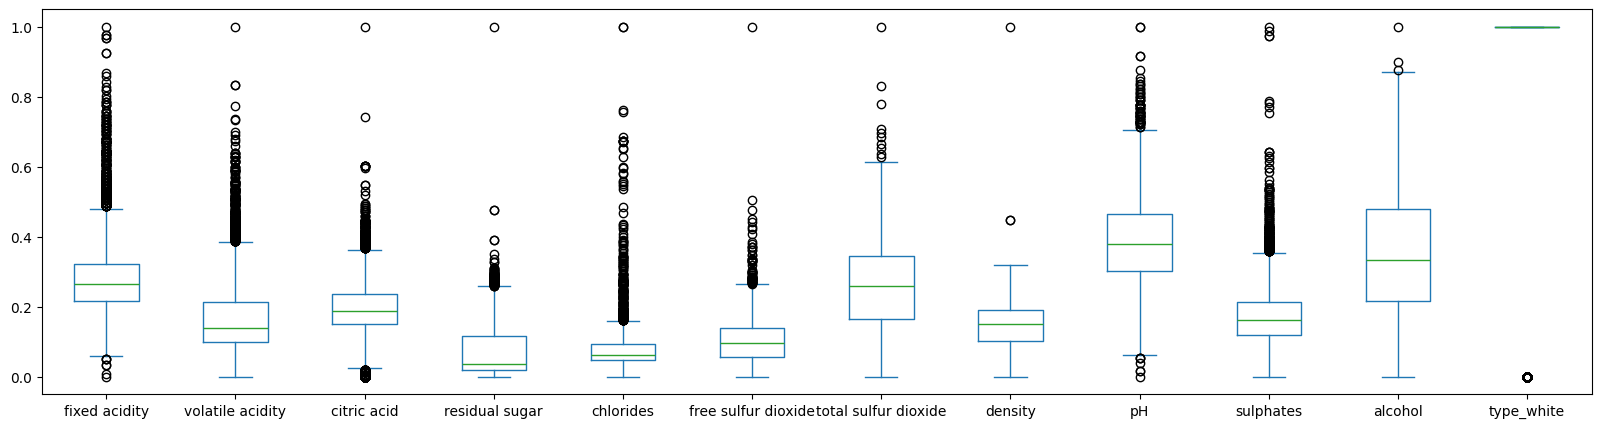

In [12]:
from sklearn.preprocessing import MinMaxScaler

X, y = get_X_and_y(df)

# set and fit the scaler
minmax_scaler = MinMaxScaler().fit(X)

df_minmax = pd.DataFrame(minmax_scaler.transform(X), columns = X.columns)
df_minmax.plot(kind='box', figsize=(20,5))

df_minmax['quality'] = y

So, let us create a model but now using the scaled data 

LogisticRegression: score = 0.5426980198019802
SVC: score = 0.5396039603960396
KNN: score = 0.5532178217821783
RF: score = 0.6658415841584159
NN: score = 0.5792079207920792


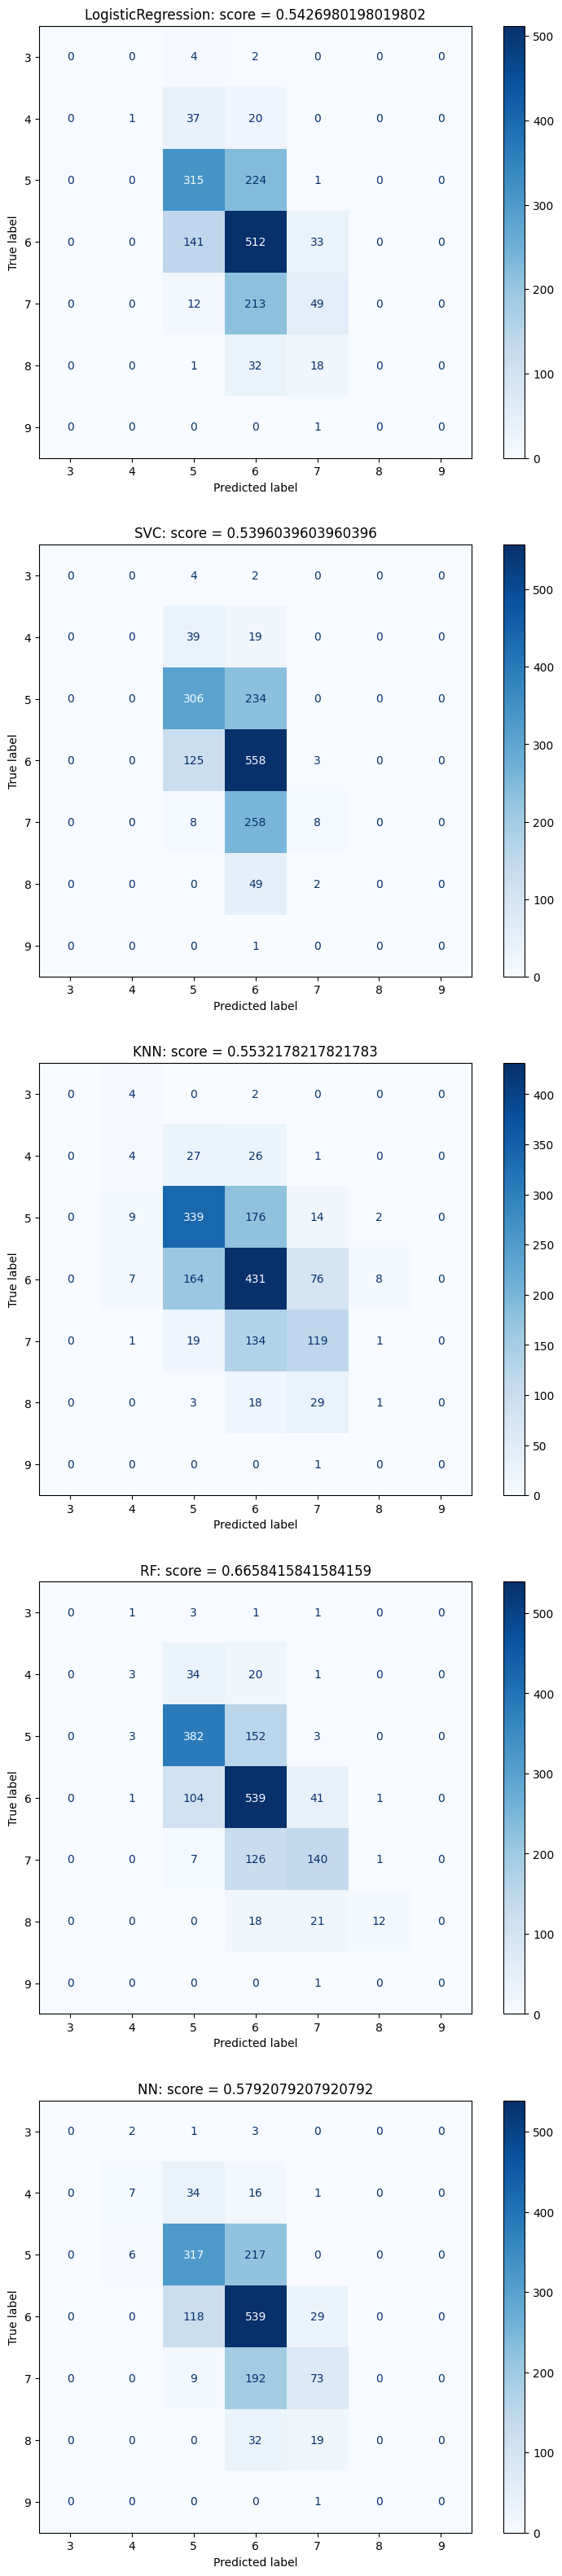

In [13]:
all_scores['with minmax'] = run(df_minmax)

## Polynomial features

Other approach is to create polynomial features. In this case, if the original set of feature is $(x_1, x_2, \ldots, x_n)$ then the polynomial features with degree 2 are $(1, x_1, x_2, \ldots, x_n, x_1^2, x_1x_2,\ldots,  x_1x_n, x_2^2, \ldots, x_2x_n, ...,  x_n^2 \ldots)$.

This can be done by coding or simply using sklearn

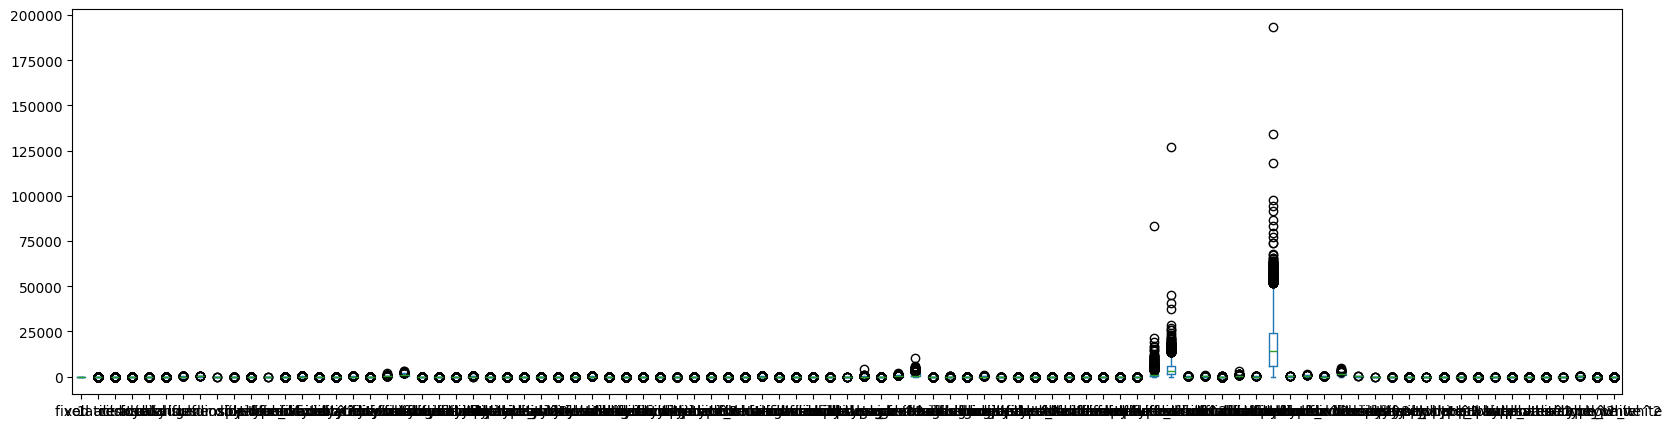

In [14]:
from sklearn.preprocessing import PolynomialFeatures

X, y = get_X_and_y(df)

# set and fit the scaler
poly = PolynomialFeatures(degree=2).fit(X)

df_poly = pd.DataFrame(poly.transform(X), columns = poly.get_feature_names_out(X.columns))

df_poly.plot(kind='box', figsize=(20,5))

df_poly['quality'] = y

Train a model using the polynomial features

/opt/anaconda3/envs/ML_IDC_metal/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: score = 0.5408415841584159
SVC: score = 0.42326732673267325
KNN: score = 0.4597772277227723
RF: score = 0.6534653465346535
NN: score = 0.3162128712871287


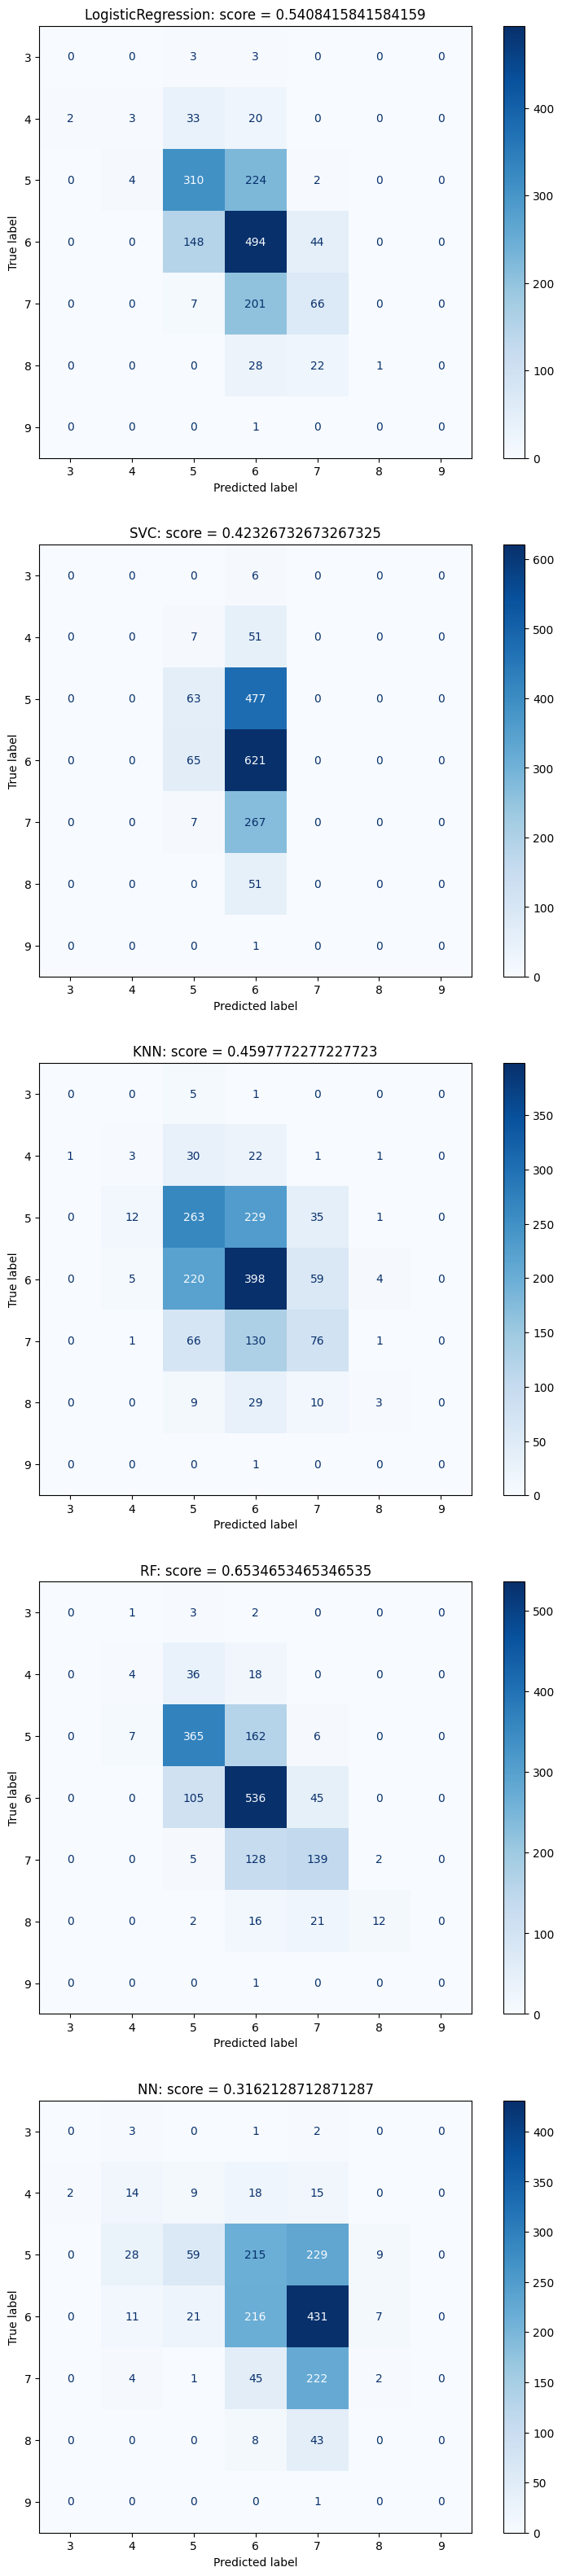

In [15]:
all_scores['with poly'] = run(df_poly)

## Normalization + Polynomial features

Now, let us combine both normalization and polynomial features

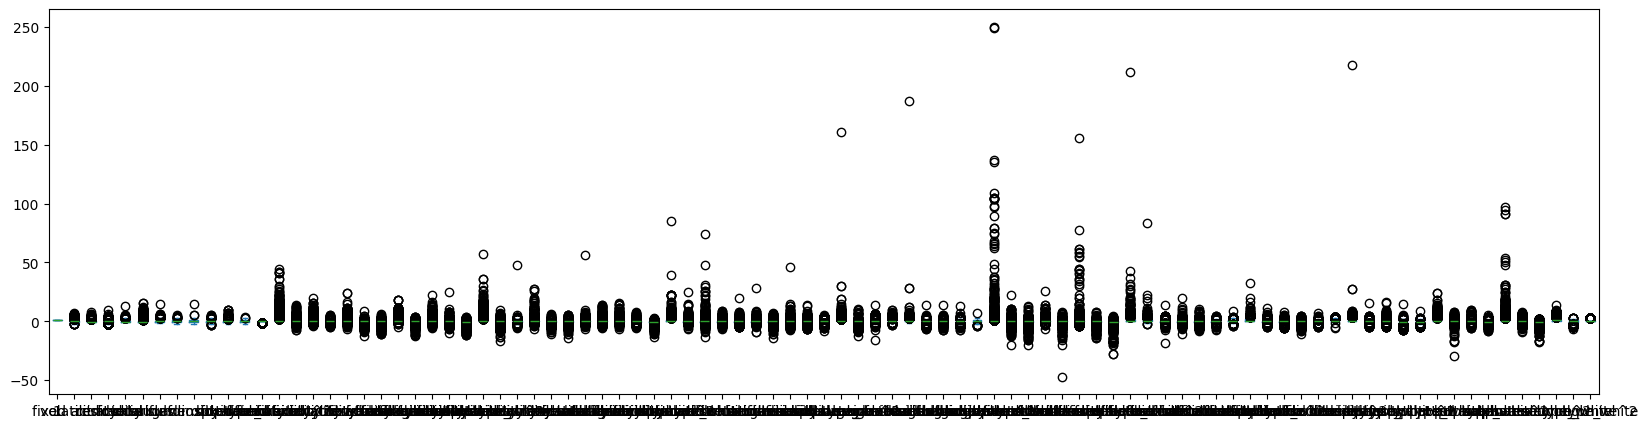

In [16]:
# get X and y
X, y = get_X_and_y(df)

# set and fit the scaler
standard_scaler = StandardScaler().fit(X)

# normalize the data
df_std = pd.DataFrame(standard_scaler.transform(X), columns = X.columns)

# set and fit the scaler
poly = PolynomialFeatures(degree=2, include_bias=True).fit(df_std)

df_std_poly = pd.DataFrame(poly.transform(df_std), columns = poly.get_feature_names_out(df_std.columns))

df_std_poly.plot(kind='box', figsize=(20,5))

df_std_poly['quality'] = y

And run the model

LogisticRegression: score = 0.5550742574257426
SVC: score = 0.5693069306930693
KNN: score = 0.5482673267326733
RF: score = 0.6590346534653465
NN: score = 0.5971534653465347


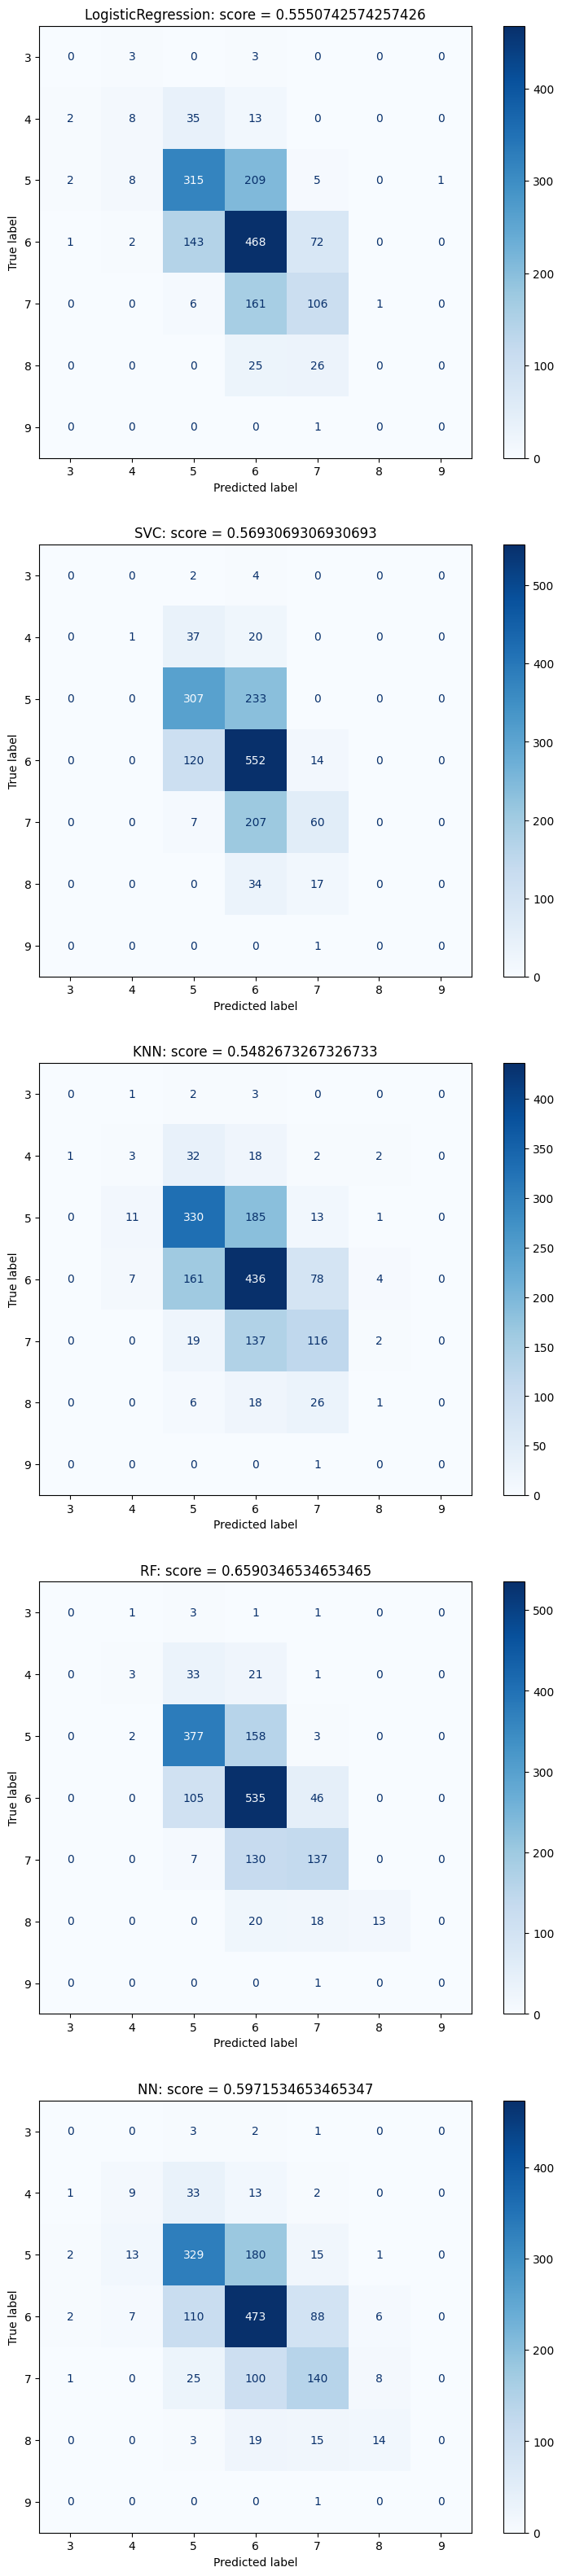

In [17]:
all_scores['with standardization and poly'] =  run(df_std_poly)

In [18]:
all_scores

,without scaling or poly,with standardization,with minmax,with poly,with standardization and poly
LogisticRegression,0.540842,0.542698,0.542698,0.540842,0.555074
SVC,0.430693,0.579208,0.539604,0.423267,0.569307
KNN,0.465347,0.554455,0.553218,0.459777,0.548267
RF,0.666460,0.665223,0.665842,0.653465,0.659035
NN,0.523515,0.561881,0.579208,0.316213,0.597153


<Axes: >

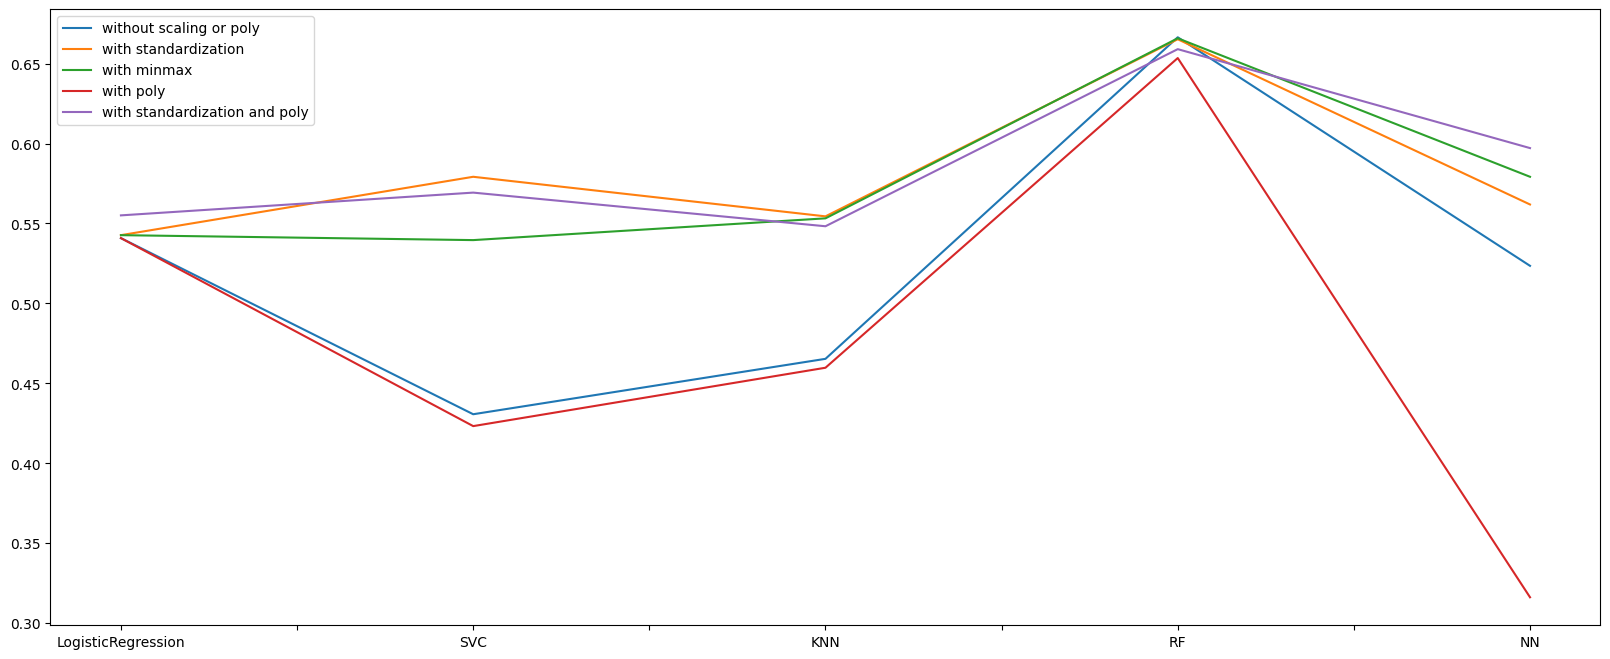

In [19]:
all_scores.plot(figsize=(20,8))